**Importing Of Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Importing** **Dataset**

In [2]:
data = pd.read_csv("study_performance.csv")

**Print columns**

In [3]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'english_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score'],
      dtype='object')


**Print data of the CSV file**

In [4]:
#print first datasets
print(data.head(5))

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   english_score  history_score  physics_score  chemistry_score  biology_score  
0             80             81             93               97        

In [5]:
#print tail 5 datasets
print(data.tail(5))

     gender race_ethnicity parental_level_of_education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     english_score  history_score  physics_score  chemistry_score  \
995             93             87             95           

In [6]:
print(data.info()) #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   english_score                1000 non-null   int64 
 9   history_score                1000 non-null   int64 
 10  physics_score                1000 non-null   int64 
 11  chemistry_score              1000 non-null   int64 
 12  biology_score                1000 non-null   int64 
dtypes: int64(8), object(5)
memory usag

In [7]:
print(data.describe()) #discribe dataset

       math_score  reading_score  writing_score  english_score  history_score  \
count  1000.00000    1000.000000    1000.000000    1000.000000    1000.000000   
mean     66.08900      69.169000      68.054000      81.328000      80.207000   
std      15.16308      14.600192      15.195657      12.023351      12.766877   
min       0.00000      17.000000      10.000000      50.000000      50.000000   
25%      57.00000      59.000000      57.750000      72.000000      69.000000   
50%      66.00000      70.000000      69.000000      83.000000      81.000000   
75%      77.00000      79.000000      79.000000      91.000000      91.000000   
max     100.00000     100.000000     100.000000      99.000000     100.000000   

       physics_score  chemistry_score  biology_score  
count    1000.000000      1000.000000    1000.000000  
mean       81.418000        80.041000      79.342000  
std        12.779851        12.721287      13.910951  
min        50.000000        50.000000      30.0000

**Check for Empty cells**

In [8]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
english_score                  0
history_score                  0
physics_score                  0
chemistry_score                0
biology_score                  0
dtype: int64


**Check** **duplicate** **values**

In [9]:
print("Any duplicated values in dataset:\n", data.duplicated().sum())

Any duplicated values in dataset:
 0


**EDA (Exploratory data analysis)**


In [10]:
#Check for Unique values
categorical_columns = ['gender', 'race_ethnicity', 'test_preparation_course', 'parental_level_of_education', 'lunch']
for col in categorical_columns:
    print(col, ":", data[col].unique())

gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
test_preparation_course : ['none' 'completed']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']


In [11]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'english_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score'],
      dtype='object')


## **Data Preprocessing**
(**Data Clean & Data Transformation**)

In [12]:
#data drop(clean)
data = data.drop(['lunch', 'parental_level_of_education', 'reading_score'], axis=1)

print(data.columns)

Index(['gender', 'race_ethnicity', 'test_preparation_course', 'math_score',
       'writing_score', 'english_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score'],
      dtype='object')


In [13]:
#Data Transformation
categorical_columns = ['gender','race_ethnicity','test_preparation_course']


def data_transformer(data):
    data['gender'] = data['gender'].map({'male': 1, 'female': 2})
    data['race_ethnicity'] = data['race_ethnicity'].map({'group A': 1,'group B': 2,'group C': 3,'group D': 4,'group E': 5})
    data['test_preparation_course'] = data['test_preparation_course'].map({'none':0 , 'completed':1})

    return data

data_transformer(data)
print(data.head(5))

   gender  race_ethnicity  test_preparation_course  math_score  writing_score  \
0       2               2                        0          72             74   
1       2               3                        1          69             88   
2       2               2                        0          90             93   
3       1               1                        0          47             44   
4       1               3                        0          76             75   

   english_score  history_score  physics_score  chemistry_score  biology_score  
0             80             81             93               97             63  
1             88             86             96              100             90  
2             77             97             95               96             65  
3             63             74             88               80             89  
4             74             77             65               65             80  


**Data visualization** (pie chart)

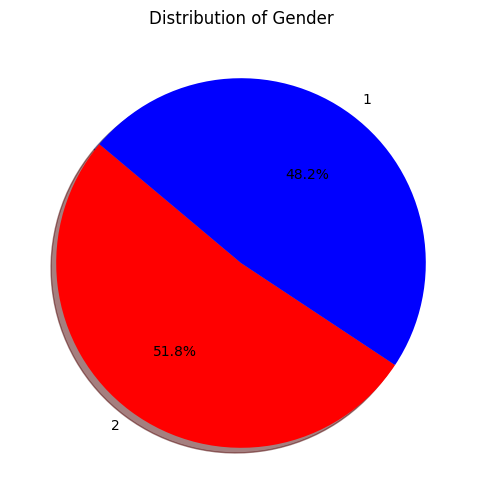

In [14]:
# Calculate gender distribution
gender_counts = data['gender'].value_counts()

# Define labels and colors
labels = gender_counts.index
sizes = gender_counts.values
colors = ["red", "blue"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Gender')
plt.show()

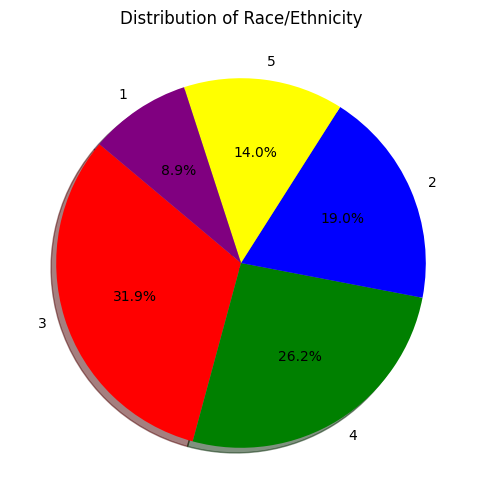

In [15]:
# Calculate Race/Ethnicity distribution
x_counts = data['race_ethnicity'].value_counts()

# Define labels and colors
labels = x_counts.index
sizes = x_counts.values
colors = ["red", "green", "blue", "yellow", "purple"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Race/Ethnicity')
plt.show()

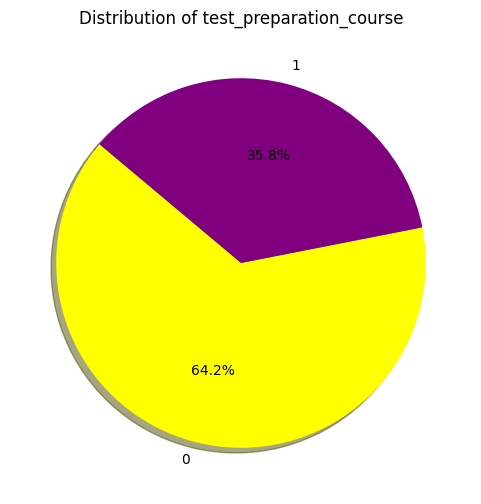

In [16]:
# Calculate test_preparation_course distribution
x_counts = data['test_preparation_course'].value_counts()

# Define labels and colors
labels = x_counts.index
sizes = x_counts.values
colors = ["yellow", "purple"]

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of test_preparation_course')
plt.show()

**Data visualization**  (**Histrogram representation**)

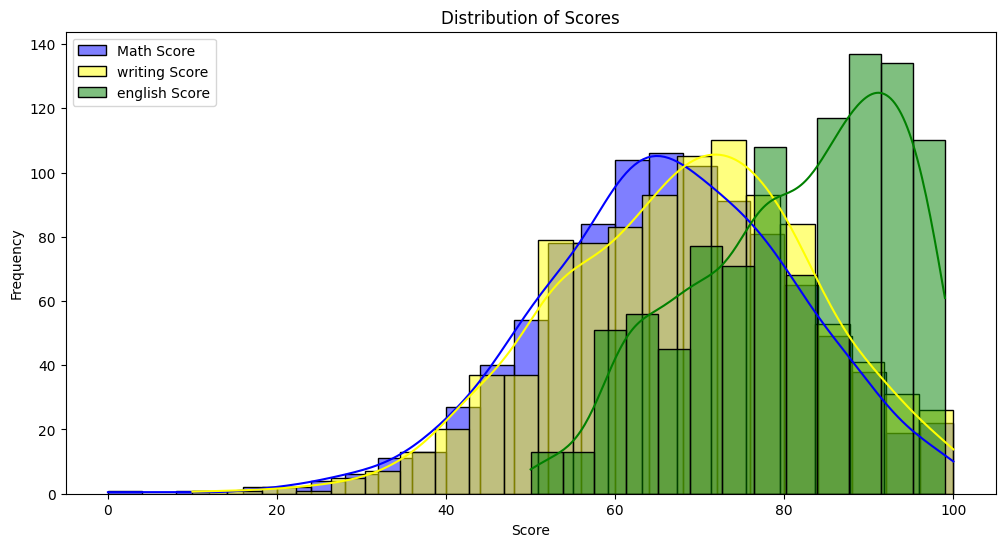

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['math_score'], kde=True, color='blue', label='Math Score')
sns.histplot(data['writing_score'], kde=True, color='yellow', label='writing Score')
sns.histplot(data['english_score'], kde=True, color='green', label='english Score')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

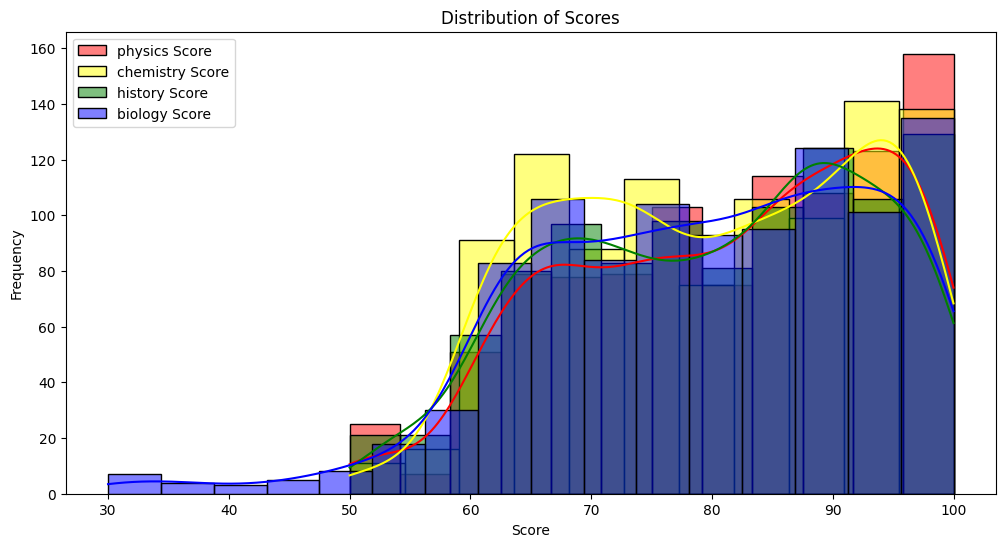

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data['physics_score'], kde=True, color='red', label='physics Score')
sns.histplot(data['chemistry_score'], kde=True, color='yellow', label='chemistry Score')
sns.histplot(data['history_score'], kde=True, color='green', label='history Score')
sns.histplot(data['biology_score'], kde=True, color='blue', label='biology Score')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [19]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'test_preparation_course', 'math_score',
       'writing_score', 'english_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score'],
      dtype='object')


**Descriptive Analysis**

In [20]:
df2 = data.copy()

print(data.head(5))

   gender  race_ethnicity  test_preparation_course  math_score  writing_score  \
0       2               2                        0          72             74   
1       2               3                        1          69             88   
2       2               2                        0          90             93   
3       1               1                        0          47             44   
4       1               3                        0          76             75   

   english_score  history_score  physics_score  chemistry_score  biology_score  
0             80             81             93               97             63  
1             88             86             96              100             90  
2             77             97             95               96             65  
3             63             74             88               80             89  
4             74             77             65               65             80  


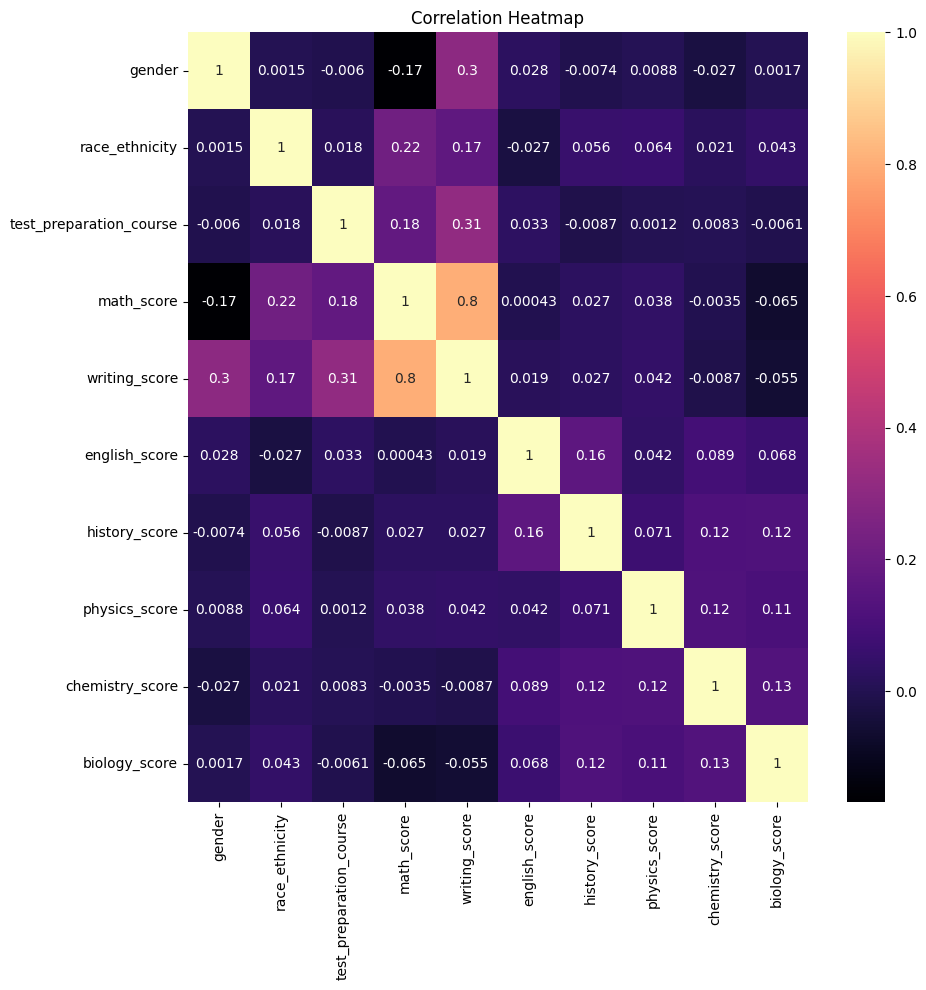

In [21]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(data=df2.corr(), cmap='magma', annot=True)
plt.title("Correlation Heatmap")

plt.show()

In [22]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'test_preparation_course', 'math_score',
       'writing_score', 'english_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score'],
      dtype='object')


**Predictive Analysis**

In [23]:
# Feature Engineering
# Assuming 'data' is your DataFrame containing scores
data['mean_score'] = data[['math_score', 'writing_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score']].mean(axis=1)

passing_threshold = 65


**Assign Pass_fail according to mean**




In [24]:
# Feature Engineering
data['pass_fail'] = np.where(data['mean_score'] >= passing_threshold, 1, 0)
print(data.columns)

Index(['gender', 'race_ethnicity', 'test_preparation_course', 'math_score',
       'writing_score', 'english_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'mean_score', 'pass_fail'],
      dtype='object')


**Split data into features and target variable**

In [25]:
# Feature Selection
X = data[['gender', 'race_ethnicity', 'test_preparation_course', 'math_score', 'writing_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score']]
y = data['pass_fail']

**Split data into train and test sets**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create classifier**

In [27]:
# Model Training
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Prediction**

In [28]:
# Evaluation
y_pred = rf_classifier.predict(X_test)

**Evaluation and Interpretation**

In [29]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.96      1.00      0.98       191

    accuracy                           0.96       200
   macro avg       0.98      0.56      0.59       200
weighted avg       0.96      0.96      0.94       200

Confusion Matrix:
[[  1   8]
 [  0 191]]


**Saving** **Model**

In [30]:
joblib.dump(rf_classifier, 'student_performance_model.pkl')
print("Model saved as student_performance_model.pkl")

Model saved as student_performance_model.pkl
